# Sipchem's Financial Analysis

This notebook performs a comprehensive financial analysis of Sipchem (Saudi International Petrochemical Company) data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [2]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [3]:
# Load the Sipchem raw data from the CSV file
sipchem_raw_data = pd.read_csv('sipchem__data.csv')

# Display the first few rows to understand the data structure
sipchem_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Sipchem,Petrochemicals,5439730,1635000,906267,23991272,9653272
1,2020,Sipchem,Petrochemicals,5323000,1172000,360000,23765000,9929000
2,2021,Sipchem,Petrochemicals,9982000,5580000,4464000,24504000,8809000
3,2022,Sipchem,Petrochemicals,10254000,3953000,4047000,23475000,6738000
4,2023,Sipchem,Petrochemicals,7617941,1356344,1418968,22023899,5601573


In [4]:
# Get a summary of the dataset including data types and non-null counts
sipchem_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Sipchem's financial statements.

In [5]:
# Sort the data by year to ensure chronological order
sipchem_raw_data = sipchem_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
sipchem_raw_data[numeric_cols] = sipchem_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
sipchem_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Sipchem,Petrochemicals,5439730.0,1635000.0,906267.0,23991272.0,9653272.0
1,2020,Sipchem,Petrochemicals,5323000.0,1172000.0,360000.0,23765000.0,9929000.0
2,2021,Sipchem,Petrochemicals,9982000.0,5580000.0,4464000.0,24504000.0,8809000.0
3,2022,Sipchem,Petrochemicals,10254000.0,3953000.0,4047000.0,23475000.0,6738000.0
4,2023,Sipchem,Petrochemicals,7617941.0,1356344.0,1418968.0,22023899.0,5601573.0
5,2024,Sipchem,Petrochemicals,7061000.0,466000.0,683000.0,21082000.0,5112000.0


In [6]:
# Create a copy of the raw data for analysis to avoid modifying the original
sipchem_new_data = sipchem_raw_data.copy()

## Growth Analysis

In [7]:
# Calculate Year-over-Year Growth for Revenue
sipchem_new_data['Revenue_Growth_%'] = sipchem_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(sipchem_new_data['Revenue_SAR'].iloc[0], sipchem_new_data['Revenue_SAR'].iloc[-1], len(sipchem_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 5.36%


## Profitability Ratios

In [8]:
# Calculate Operating Margin as a percentage
sipchem_new_data['Operating_Margin_%'] = (sipchem_new_data['Operating_Income_SAR'] / sipchem_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
sipchem_new_data['Net_Profit_Margin_%'] = (sipchem_new_data['Net_Income_SAR'] / sipchem_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(sipchem_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019           16.660147            30.056639
1  2020            6.763104            22.017659
2  2021           44.720497            55.900621
3  2022           39.467525            38.550809
4  2023           18.626660            17.804601
5  2024            9.672851             6.599632


## Financial Position

In [9]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
sipchem_new_data['Liabilities_to_Assets_Ratio'] = (sipchem_new_data['Total_Liabilities_SAR'] / sipchem_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
sipchem_new_data['Asset_Turnover_Ratio'] = sipchem_new_data['Revenue_SAR'] / sipchem_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(sipchem_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    40.236599              0.226738
1  2020                    41.779928              0.223985
2  2021                    35.949233              0.407362
3  2022                    28.702875              0.436805
4  2023                    25.434066              0.345894
5  2024                    24.248174              0.334930


## Visualizations

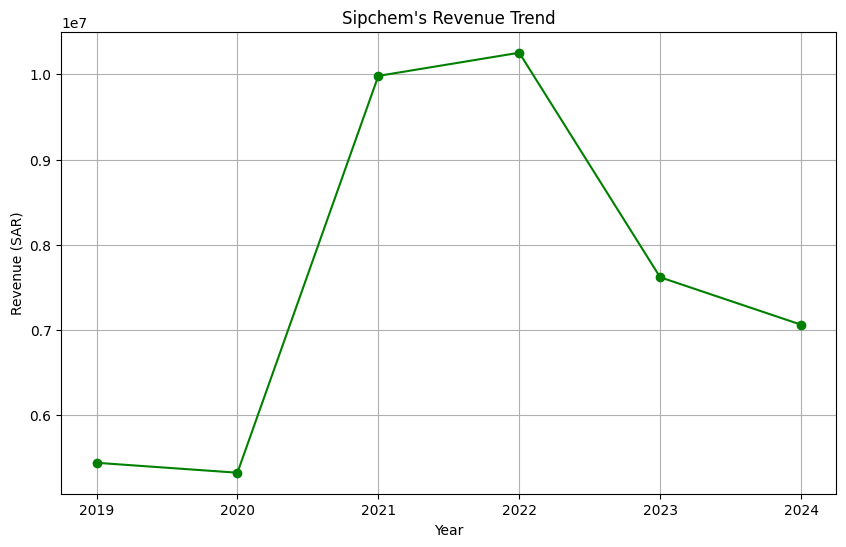

In [10]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(sipchem_new_data["Year"], sipchem_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Sipchem's Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

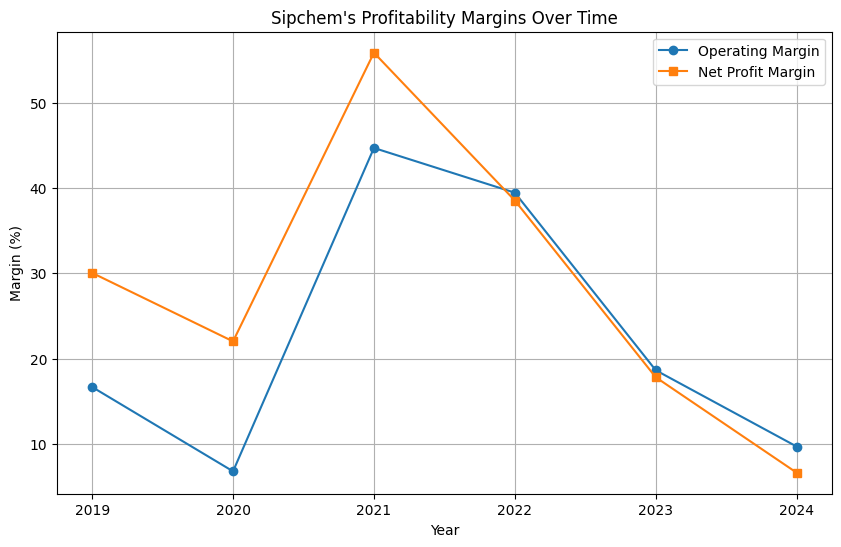

In [11]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(sipchem_new_data["Year"], sipchem_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(sipchem_new_data["Year"], sipchem_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Sipchem's Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [12]:
# Save the analysis results to a CSV file
sipchem_new_data.to_csv('sipchem_analysis_results.csv', index=False)
print("Analysis results saved to 'sipchem_analysis_results.csv'")

Analysis results saved to 'sipchem_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Sipchem's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.